#      Capstone Project - Wallmart-Sales-Forcast

## Table of Contents
#### 1. Problem Statement
#### 2. Project Objective
#### 3. Data Description
#### 4. Data Pre-processing Steps and Inspiration
#### 5. Choosing the Algorithm for the Project
#### 6. Motivation and Reasons For Choosing the Algorithm
#### 7. Assumptions
#### 8. Model Evaluation and Techniques
#### 9. Inferences from the Same
#### 10. Future Possibilities of the Project
#### 11. Conclusion
#### 12. References

## Problem Statement

#### Summary Problem Statement:
A retail store chain with multiple outlets nationwide is encountering challenges in effectively managing its inventory to align supply with demand. As a data scientist, the task is to analyze the available data, extract valuable insights, and develop prediction models to forecast sales for a specific timeframe, be it months or years. The objective is to provide the retail store with actionable information and accurate sales forecasts to optimize inventory management and enhance overall operational efficiency.

## Project Objective

### Project Objective:
The objective of this project is to utilize data analysis and predictive modeling techniques as a data scientist to address the inventory management challenges faced by a retail store chain with multiple outlets across the country. The project aims to achieve the following objectives:

Data Analysis: Perform thorough analysis of the available data to gain insights into the demand patterns, sales trends, and inventory levels across different outlets.

Forecasting: Develop accurate and reliable prediction models to forecast sales for a specified future period, such as months or years. These models will help the retail store anticipate customer demand and align their supply accordingly.

Optimization: Optimize inventory management by utilizing the sales forecasts to determine optimal stocking levels, identify potential stockouts or excess inventory situations, and streamline the supply chain processes.

Actionable Insights: Provide the retail store management with actionable insights and recommendations based on the data analysis and predictive modeling results. These insights will support informed decision-making, such as adjusting inventory levels, planning promotions, or identifying underperforming outlets.

Performance Evaluation: Assess the performance of the prediction models using appropriate evaluation metrics, such as accuracy, precision, recall, or F1 score. Continuously refine and improve the models based on the evaluation results to enhance their predictive capabilities.

By achieving these project objectives, the aim is to enable the retail store chain to efficiently manage their inventory, reduce stockouts and excess inventory, improve customer satisfaction, and ultimately drive profitability across their outlets nationwide.

## Data Description

### The walmart.csv contains 6435 rows and 8 columns.

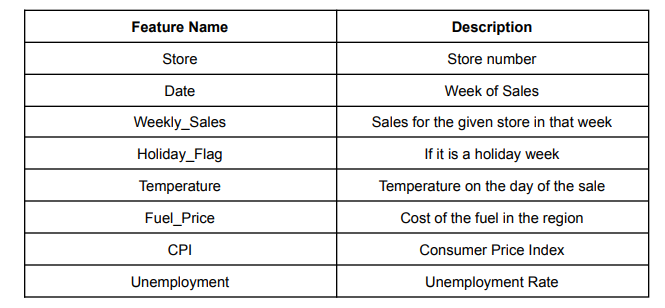

In [1]:
## importing the library 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler


from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\DATA\Walmart (1) (1).csv")

In [3]:
df1 = data.copy()

In [4]:
data.shape

(6435, 8)

In [5]:
data.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4476,32,03-12-2010,1200892.56,0,35.18,2.712,190.993144,9.137
5631,40,18-02-2011,968694.45,0,21.82,3.263,133.370143,5.114
2270,16,29-06-2012,570162.28,0,77.31,3.693,197.785577,6.169
213,2,10-06-2011,1929153.16,0,83.40,3.648,214.696491,7.931
1025,8,23-07-2010,785515.88,0,78.29,2.608,214.602966,6.315


In [6]:
data.info() # we have 1 obejct feature and rest are numerical column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
# changing date column to datetime 

In [8]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

## EDA

In [9]:
data.isnull().sum() #There are no null values in the dataset 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [10]:
#Outlier Detection and Abnormalities
agg_data = data.groupby('Store').Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

,Store,max,min,mean,median,std
0,1,2387950.20,1316899.31,1.555264e+06,1534849.64,155980.767761
1,2,3436007.68,1650394.44,1.925751e+06,1879107.31,237683.694682
2,3,605990.41,339597.38,4.027044e+05,395107.35,46319.631557
3,4,3676388.98,1762539.30,2.094713e+06,2073951.38,266201.442297
4,5,507900.07,260636.71,3.180118e+05,310338.17,37737.965745


In [11]:
##We can chack the max and min weekly sales of the stores 

In [12]:
# Monthly Sales for Each Year
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,4.223988e+07,1.915869e+08,1.862262e+08,1.838118e+08,2.806119e+08,1.424361e+08,1.842664e+08,1.845381e+08,1.797041e+08,2.311201e+08,1.587731e+08,3.235716e+08
2011,2.119657e+08,1.876092e+08,1.365205e+08,2.789693e+08,1.828017e+08,1.401936e+08,2.244611e+08,1.880810e+08,2.310323e+08,1.837193e+08,2.534703e+08,2.293760e+08
2012,1.722207e+08,1.428296e+08,2.307397e+08,1.825428e+08,1.422830e+08,2.923883e+08,1.845865e+08,1.916126e+08,1.797959e+08,1.880794e+08,4.692588e+07,4.612851e+07


In [13]:
## we can see that weekly sales for most of the months have decrease after 2010 

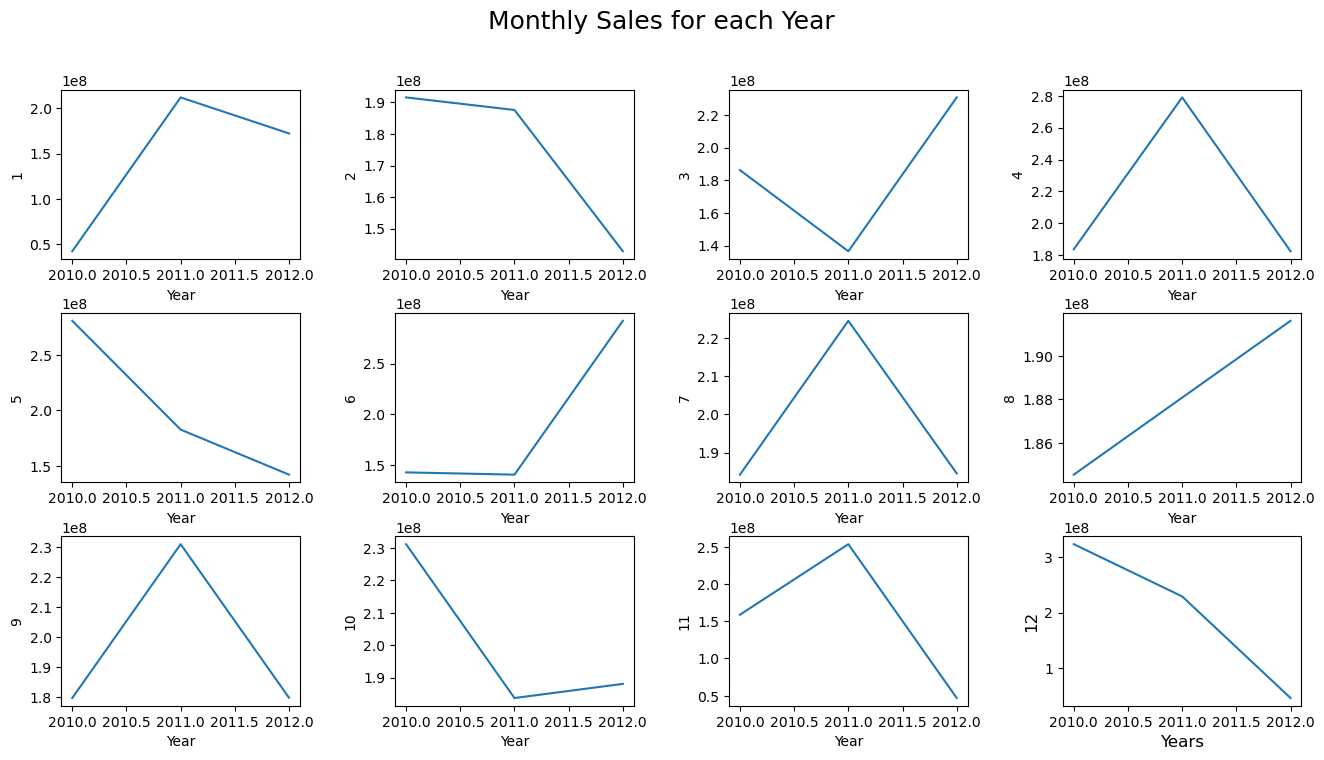

In [14]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('monthly_sales_every_year.png')
plt.show()

In [15]:
# IN the plot we can see sales for months for 3 years

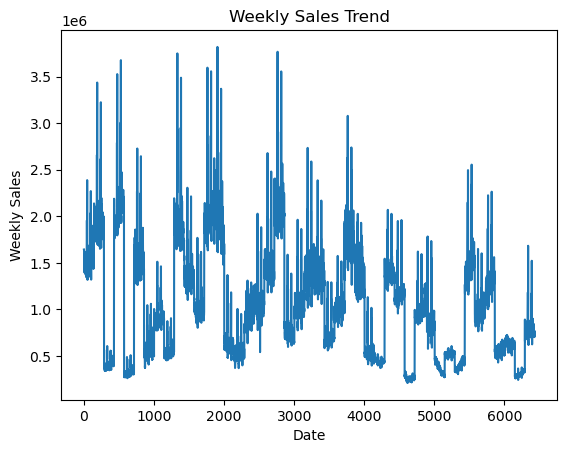

In [16]:
plt.plot(data.index, data['Weekly_Sales']) #trend of weekly sales 

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Trend')

plt.show()

In [17]:
## we can see some high peaks and lows in the trends , mostly its staionary 

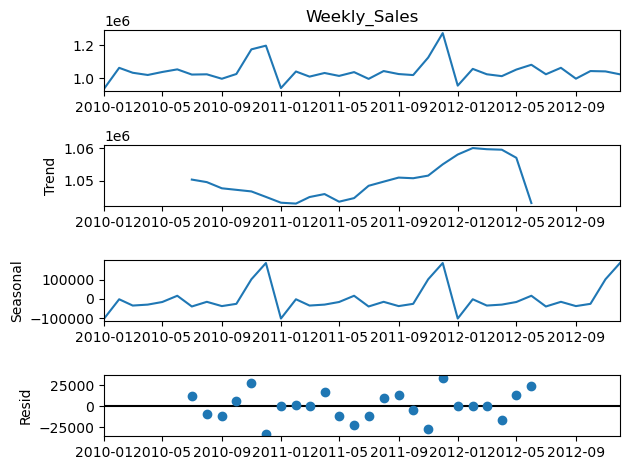

In [18]:
# Set the 'Date' column as the index and convert it to a datetime type
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Perform seasonal decomposition of the mean weekly sales
decomposition = sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive')

# Plot the decomposed components
fig = decomposition.plot()
plt.savefig('seasonal_decompose.png')
plt.show()

In [19]:
## we can take out the infrence from the time decompostion of weekly sales in month interval 
# weekly sales follows quit same trajectory but there are two peaks 
# trends shows that our weekly sales took a jump and recently going down 
# sesnality shows regular patterns except for few peaks 


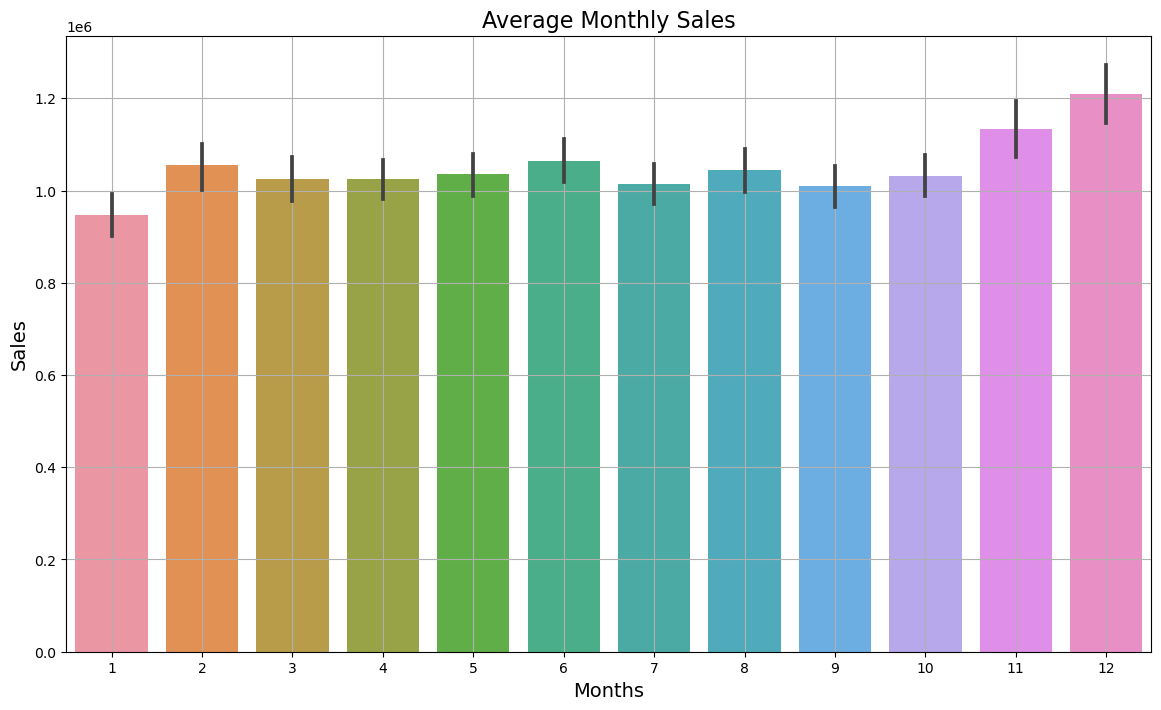

In [20]:
#Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('avg_monthly_sales.png')
plt.grid()

In [21]:
## average monthly sales for month 11th and 12th is greater than rest , may be its effect of holidays 

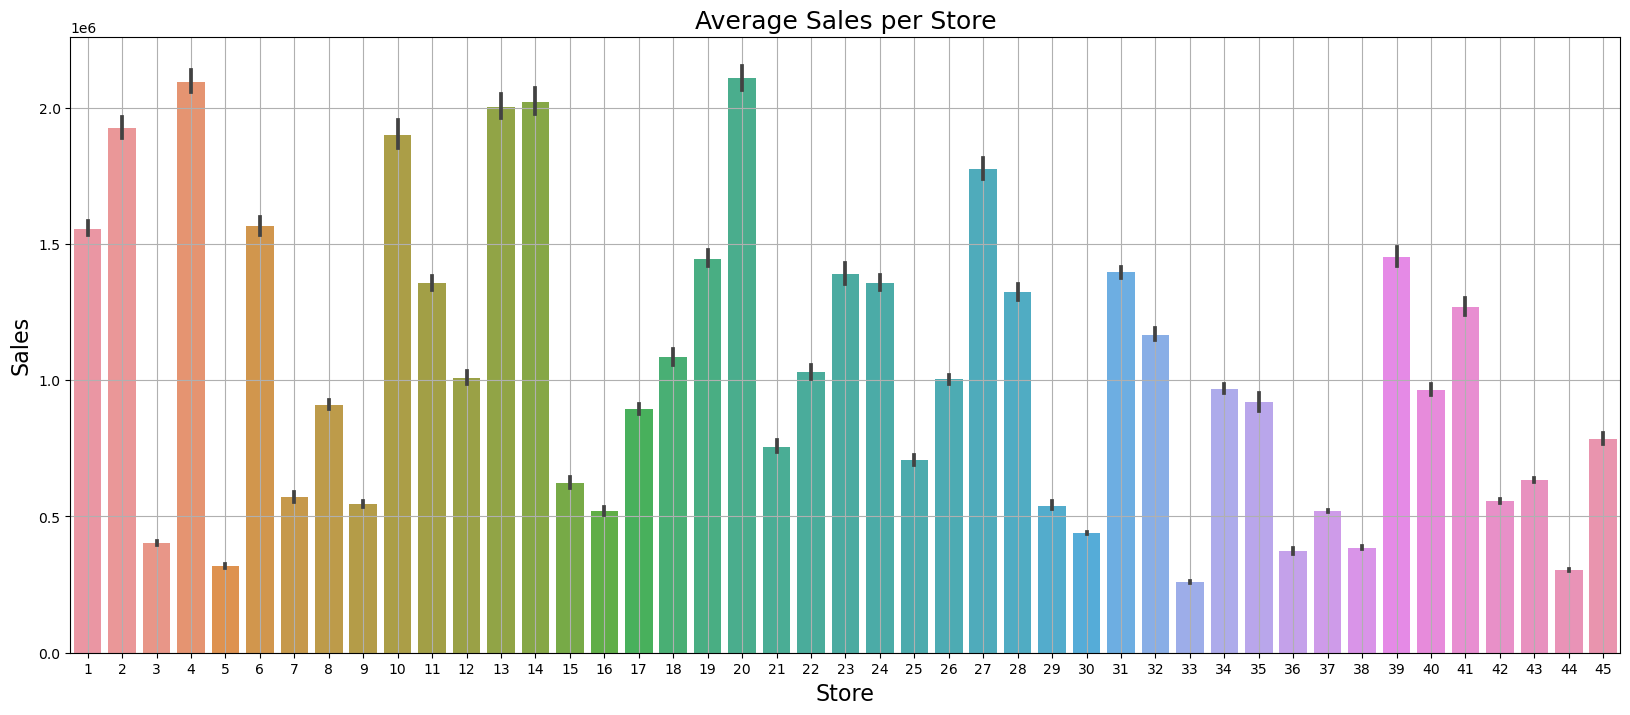

In [22]:
#Average Weekly Sales Store wise
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('avg_sales_store.png')
plt.show()

In [23]:
## We can compaire average weekly sales for all the stores 

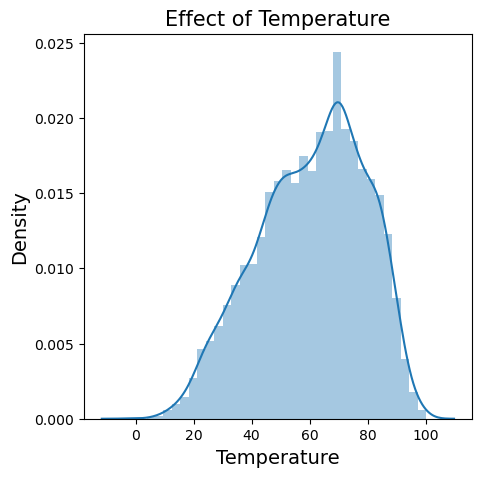

In [24]:
# Effect of Temperature on Sales
plt.figure(figsize=(5,5))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('effect_of_temp.png')
plt.show() # its left sckwed data 

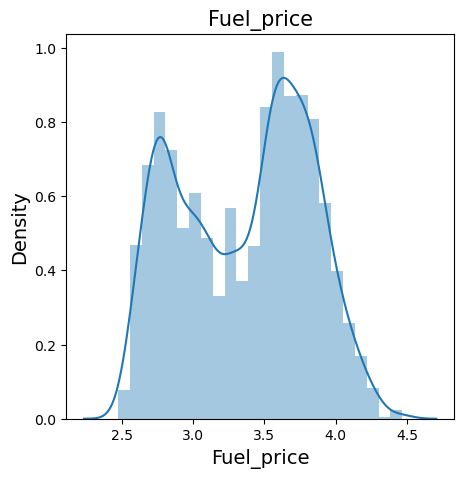

In [25]:
# Effect of Fuel_Price on Sales
plt.figure(figsize=(5,5))
sns.distplot(data['Fuel_Price'])
plt.title('Fuel_price',fontsize=15)
plt.xlabel('Fuel_price',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show() # fuel have two peaks in its distribution 

In [26]:
## Effect of holidays on sales
# Group the data by the 'Holiday' column and calculate the average sales for each group
sales_by_holiday = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Print the average sales for holiday and non-holiday weeks
print("Average sales on holidays:", sales_by_holiday[1])  # Assuming 1 represents holidays in the 'Holiday' column
print("Average sales on non-holidays:", sales_by_holiday[0])  # Assuming 0 represents non-holidays

Average sales on holidays: 1122887.8923555557
Average sales on non-holidays: 1041256.3802088555


([<matplotlib.axis.XTick at 0x1dd460df820>,
 [Text(0, 0, 'Non-Holiday'), Text(1, 0, 'Holiday')])

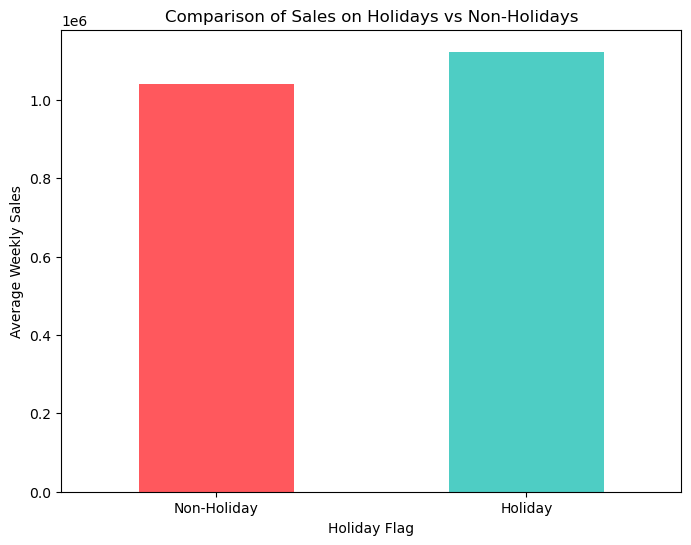

In [27]:
sales_by_holiday = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
plt.figure(figsize=(8, 6))
colors = ['#FF585D', '#4ECDC4']  # Customize colors for holidays and non-holidays
sales_by_holiday.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.title('Comparison of Sales on Holidays vs Non-Holidays')

# Customize x-axis labels
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)

In [28]:
## we can see average sales are greater on holidays

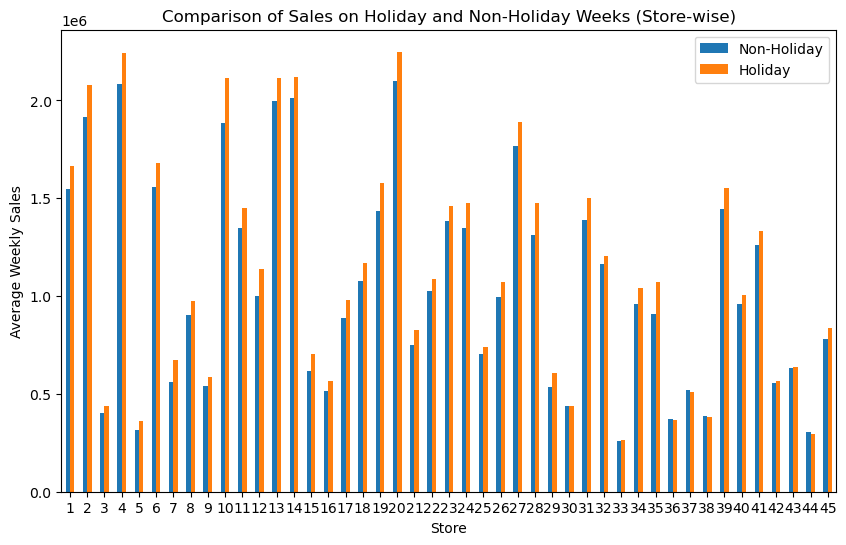

In [29]:
sales_by_store_holiday = data.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

# Plotting the graph
sales_by_store_holiday.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Comparison of Sales on Holiday and Non-Holiday Weeks (Store-wise)')
plt.legend(['Non-Holiday', 'Holiday'])
plt.xticks(rotation=0)
plt.show()

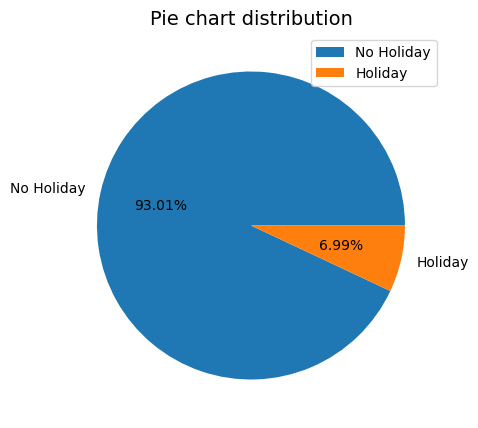

In [30]:
# Holiday Distribution
plt.figure(figsize=(5,5))
plt.pie(data['Holiday_Flag'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('holiday_distribution.png')
plt.show() 

In [31]:
#There are more unholidays 

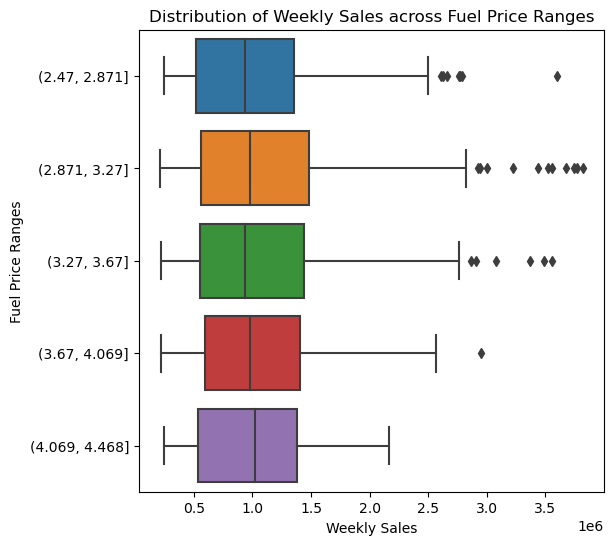

In [32]:
# Create fuel price ranges
df1['Fuel_Price_Range'] = pd.cut(df1['Fuel_Price'], bins=5)   

# Create the box plot using seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='Weekly_Sales', y='Fuel_Price_Range', data=df1)

plt.xlabel('Weekly Sales')
plt.ylabel('Fuel Price Ranges')
plt.title('Distribution of Weekly Sales across Fuel Price Ranges')

plt.show()

In [33]:
## we can see that when fuel price is low the sales are very high 

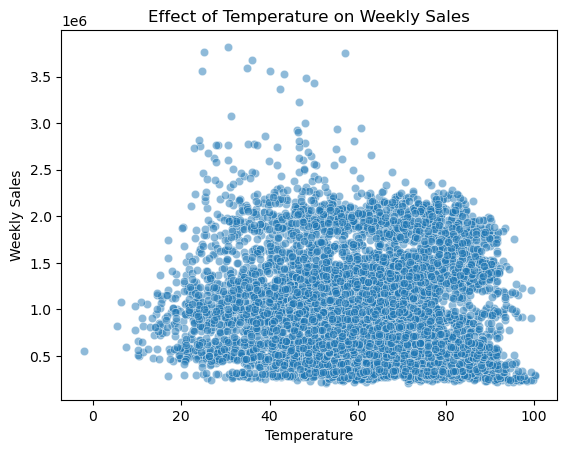

In [34]:
## Effect of temperature on weekly sales 
# Plot the scatter plot
sns.scatterplot(x=data['Temperature'], y=data['Weekly_Sales'], alpha=0.5)

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Effect of Temperature on Weekly Sales')

plt.show()

In [35]:
## IN moderate temperature sales goes really high

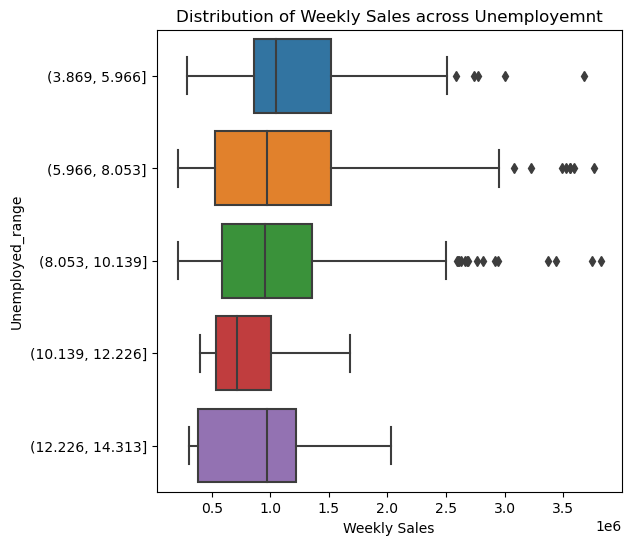

In [36]:
# Effect of unemployment on weekly sales 
df1['unemployed_range'] = pd.cut(df1['Unemployment'], bins=5)   

# Create the box plot using seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='Weekly_Sales', y='unemployed_range', data=df1)

plt.xlabel('Weekly Sales')
plt.ylabel('Unemployed_range')
plt.title('Distribution of Weekly Sales across Unemployemnt')

plt.show()

In [37]:
## As the unemployment increase the sales goes down , Most sales are recored in unemployemnt range 5 to 10 

In [38]:
## Correlation between features 

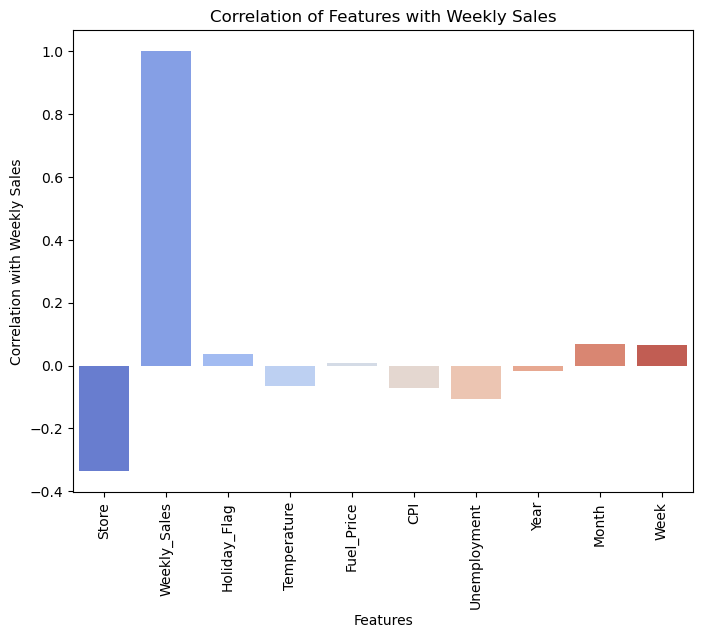

In [39]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Filter the correlation values for 'WeeklySales'
correlation = corr_matrix['Weekly_Sales']

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Weekly Sales')
plt.title('Correlation of Features with Weekly Sales')
plt.show()

In [40]:
## We can see that all the feature like temperature , fuel_price , CPI , unemployment have a neagtive correlation 
## with weekly sales its show that all the feature effect the sales of store in negative way, The less it is the more is sales
## holiday have a poitive impact on sales so more holidays are more sales 

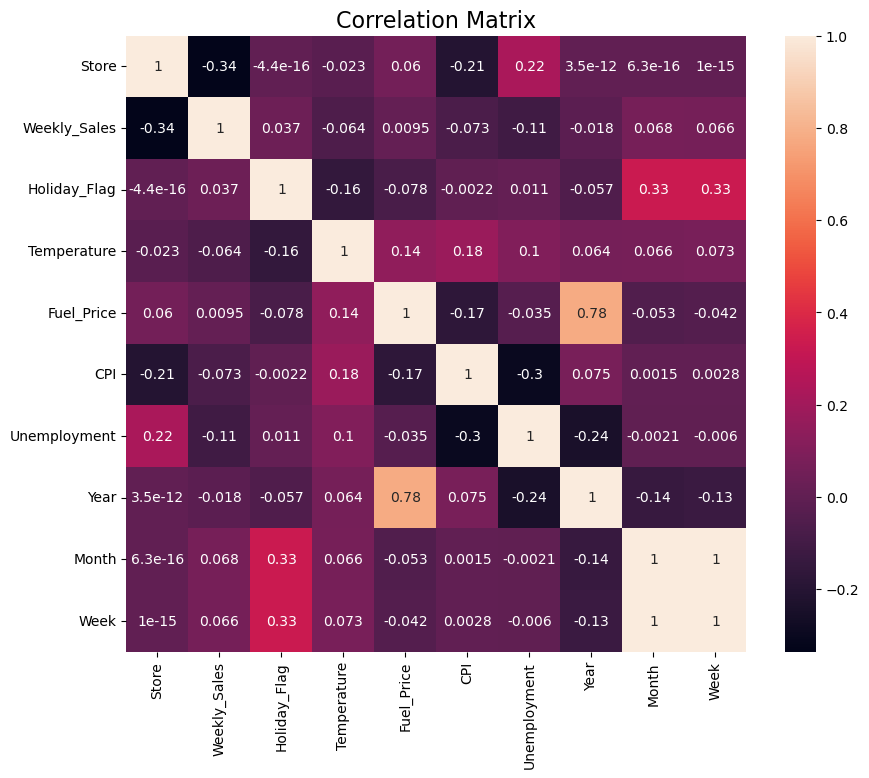

In [41]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('correlation_matrix.png')
plt.show()

 ## Data Preprocessing Steps And Inspiration

In [42]:
data.columns 

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Week'],
      dtype='object')

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

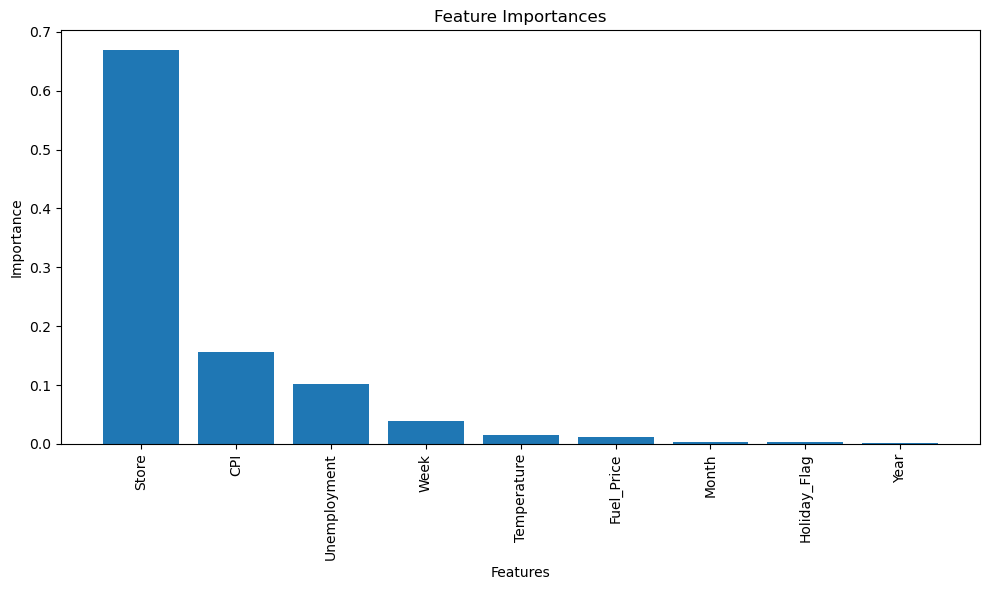

In [44]:
X = data.drop('Weekly_Sales', axis=1)  # Replace 'target_column' with the actual target column name
y = data['Weekly_Sales']

# Initialize the Random Forest model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Sort the importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [45]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

In [46]:
data2=df1.drop(columns=["Holiday_Flag","Temperature","Fuel_Price","CPI","unemployed_range","Fuel_Price_Range"])

In [47]:
data2 = data2.drop('Date',axis=1)

In [48]:
data2.head()

,Store,Weekly_Sales,Unemployment,Year,Month,Day
0,1,1643690.90,8.106,2010,5,2
1,1,1641957.44,8.106,2010,12,2
2,1,1611968.17,8.106,2010,2,19
3,1,1409727.59,8.106,2010,2,26
4,1,1554806.68,8.106,2010,5,3


## Choosing the Algorithm For the Project


We Have Different 45 Store So Need To Split According to each store for taking each store samples for training


In [49]:
x_train1=pd.DataFrame()
x_test1=pd.DataFrame()
y_train1=pd.DataFrame()
y_test1=pd.DataFrame()
for i in range(1,46):
    datas=data2[data2['Store']==i]
    X=datas.drop(columns=['Weekly_Sales'])
    Y=datas['Weekly_Sales']
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
    x_train1=pd.concat([x_train1, x_train], axis=0)
    x_test1=pd.concat([x_test1, x_test], axis=0)
    y_train1=pd.concat([y_train1, y_train], axis=0)
    y_test1=pd.concat([y_test1, y_test], axis=0)

In [50]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)
x_train1

(4500, 5)
(1935, 5)
(4500, 1)
(1935, 1)


,Store,Unemployment,Year,Month,Day
66,1,7.682,2011,5,13
30,1,7.787,2010,3,9
50,1,7.742,2011,1,21
128,1,6.908,2012,7,20
73,1,7.962,2011,1,7
...,...,...,...,...,...
6301,45,8.899,2010,9,4
6395,45,8.424,2012,1,27
6359,45,8.521,2011,5,20
6409,45,8.567,2012,4,5


## Linear Regression Model

In [51]:
lr = LinearRegression()
lr.fit(x_train1, y_train1)

LinearRegression()

In [52]:
linear_regression_accuracy = lr.score(x_test1,y_test1)*100
print("Linear Regressor Accuracy - ",linear_regression_accuracy)

Linear Regressor Accuracy -  11.711660715057592


In [53]:
y_pred = lr.predict(x_test1)
print("MAE" , metrics.mean_absolute_error(y_test1, y_pred))
print("MSE" , metrics.mean_squared_error(y_test1, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))
print("R2" , metrics.explained_variance_score(y_test1, y_pred))

MAE 443337.93734882073
MSE 288094392931.2393
RMSE 536744.2528162173
R2 0.12028880179343604


# 2. Random Forest Regressor


In [54]:
RF=RandomForestRegressor()
RF.fit(x_train1,y_train1)
y_pred=RF.predict(x_test1)
r2=r2_score(y_test1,y_pred)
r2

0.9580996158711712

In [55]:
print("MAE" , metrics.mean_absolute_error(y_test1, y_pred))
print("MSE" , metrics.mean_squared_error(y_test1, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))
print("R2" , metrics.explained_variance_score(y_test1, y_pred))

MAE 71784.41813245475
MSE 13672548183.539604
RMSE 116929.67195515262
R2 0.9607588486187489


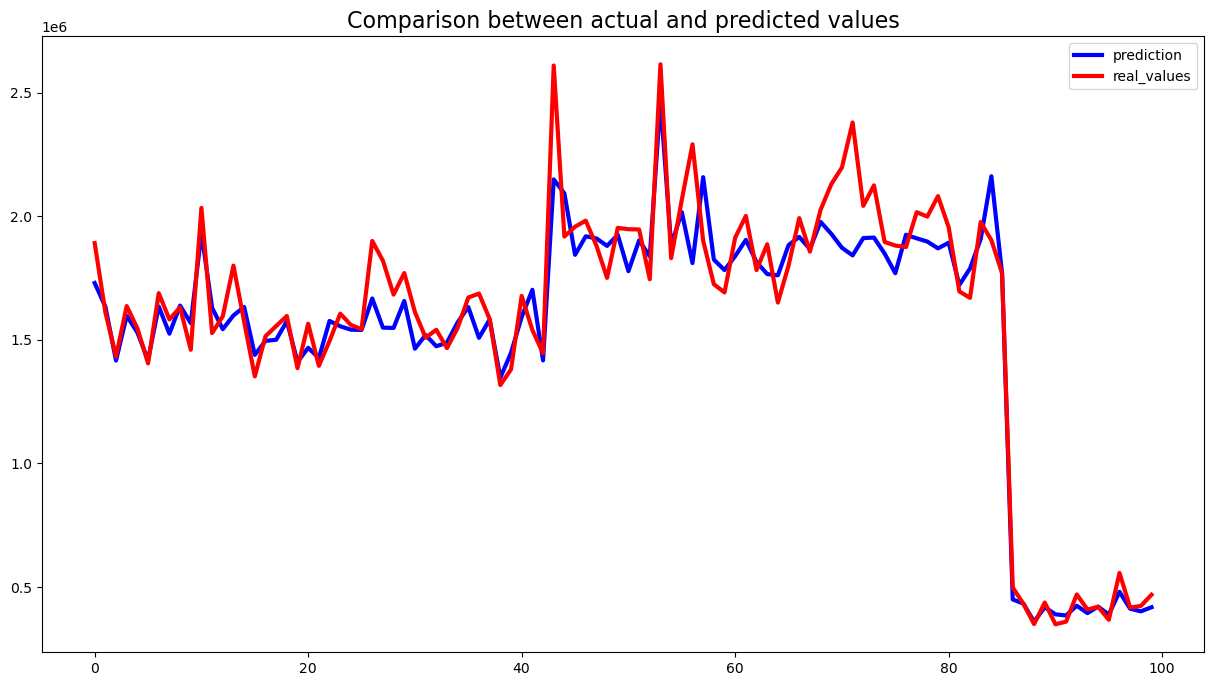

In [56]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(RF.predict(x_test1[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test1[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
# plt.savefig('rf_real_pred.png')
plt.show()

# 4. XGBoost Regressor

In [57]:
xgbr = XGBRegressor()
xgbr.fit(x_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
xgboost_accuracy = xgbr.score(x_test1,y_test1)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  96.04126166072749


In [59]:
y_pred = xgbr.predict(x_test1)

In [60]:
print("MAE" , metrics.mean_absolute_error(y_test1, y_pred))
print("MSE" , metrics.mean_squared_error(y_test1, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))
print("R2" , metrics.explained_variance_score(y_test1, y_pred))

MAE 72228.64596543928
MSE 12917791045.378168
RMSE 113656.46064073159
R2 0.9635731033204652


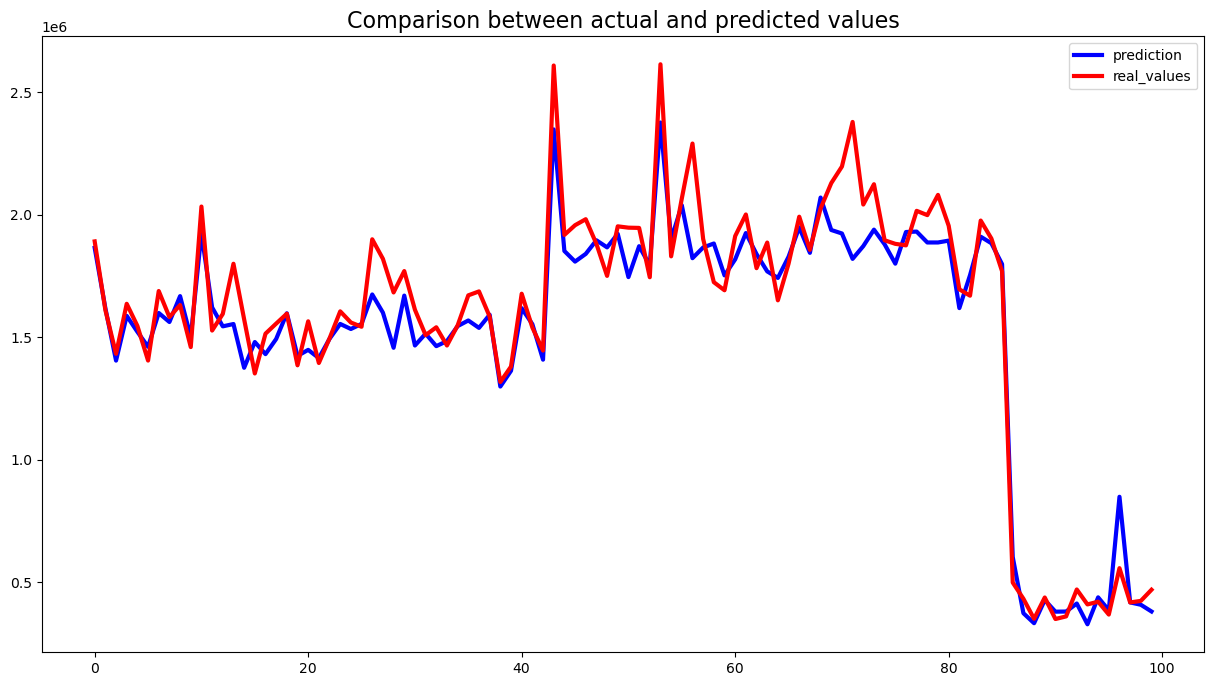

In [61]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(xgbr.predict(x_test1[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test1[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
#plt.savefig('plots/xgb_real_pred.png')
plt.show()

## XG BOOST is giving the best reult out of all the algorithm 

Forecasting Sales for each Store For Next 12 Weeks

In [62]:
data3=df1.copy()

In [63]:
#Making Format For Next 12 Weeks

from datetime import timedelta
futdate=[]
futstore=[]
futemplo=[]
for i in range(1,46):
    st=data3[data3['Store']==i]
    for m in range (1,13):
        d11=st['Date'].max()+timedelta(weeks=m)
        futdate.append(d11)
        futstore.append(i)
        futemplo.append(st['Unemployment'].mean())

In [64]:
fdf=pd.DataFrame()
fdf['Date']=futdate
fdf['Store']=futstore
fdf['Unemployment']=futemplo

In [65]:
fdf["Year"]=pd.DatetimeIndex(fdf["Date"]).year
fdf["Month"]=pd.DatetimeIndex(fdf["Date"]).month
fdf["Day"]=pd.DatetimeIndex(fdf["Date"]).day

newfuture=fdf.drop(columns=["Date"])
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [66]:
newfuture

,Store,Unemployment,Year,Month,Day
0,1,7.610,2012,12,17
1,1,7.610,2012,12,24
2,1,7.610,2012,12,31
3,1,7.610,2013,1,7
4,1,7.610,2013,1,14
...,...,...,...,...,...
535,45,8.649,2013,2,4
536,45,8.649,2013,2,11
537,45,8.649,2013,2,18
538,45,8.649,2013,2,25


In [67]:
newfuture['Predicted_Sales']= xgbr.predict(newfuture)#new Created Next 12 weeks Data Pass Throught our Regressor

In [68]:
newfuture

,Store,Unemployment,Year,Month,Day,Predicted_Sales
0,1,7.610,2012,12,17,1953824.750
1,1,7.610,2012,12,24,2427049.750
2,1,7.610,2012,12,31,1498908.125
3,1,7.610,2013,1,7,1488218.125
4,1,7.610,2013,1,14,1370671.750
...,...,...,...,...,...,...
535,45,8.649,2013,2,4,759921.812
536,45,8.649,2013,2,11,746696.625
537,45,8.649,2013,2,18,727043.812
538,45,8.649,2013,2,25,757221.875


 Above are predicted weekly_Sales for 3-4 months per each store

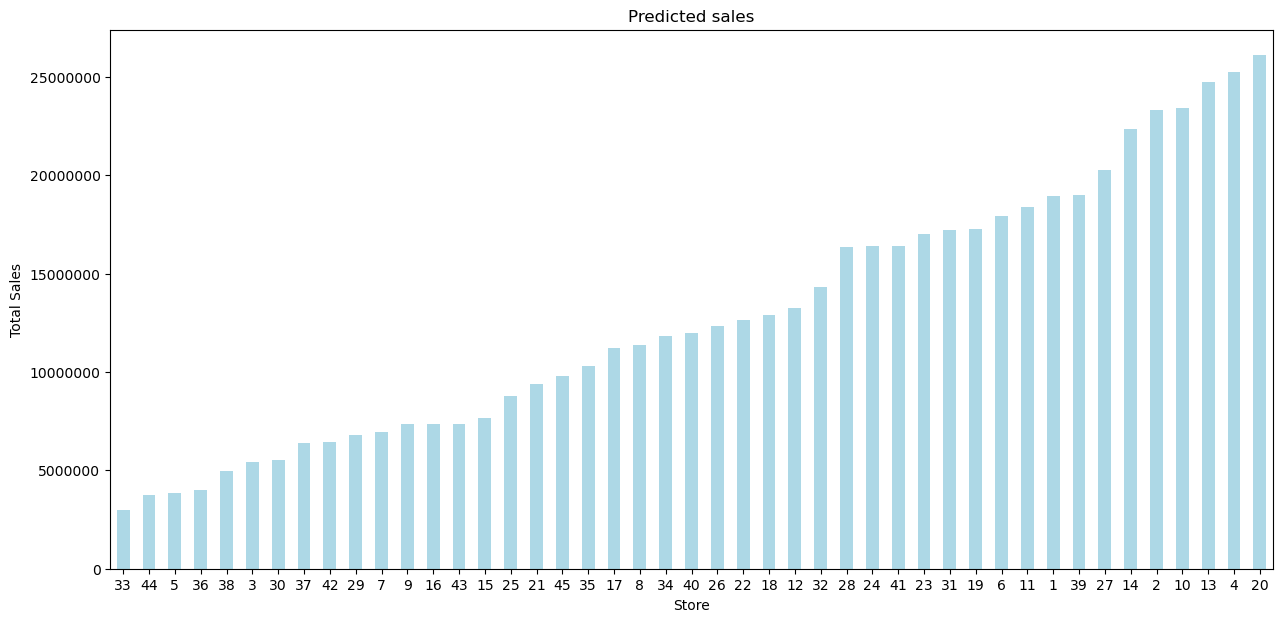

In [69]:
plt.figure(figsize=(15,7))

a = newfuture.groupby('Store')['Predicted_Sales'].sum().sort_values() 
ax = a.plot(kind='bar',color='lightblue');
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=0)
plt.title('Predicted sales')
plt.xlabel('Store')
plt.ylabel('Total Sales');